In [99]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [183]:
housing=pd.read_csv("/users/kundanikapradhan/Desktop/ml/Housing.csv")

In [184]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [70]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking,arearm
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,1819.852599
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,839.091825
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,381.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1237.500000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1666.666667
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,2183.333333
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,6600.000000


In [71]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
arearm              0.0
dtype: float64

%matplotlib inline 

In [30]:
#for plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

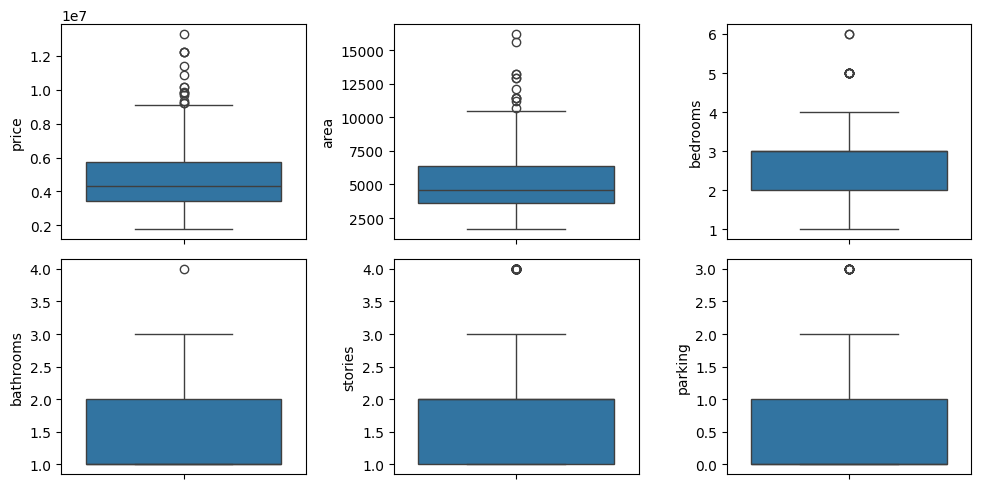

In [114]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

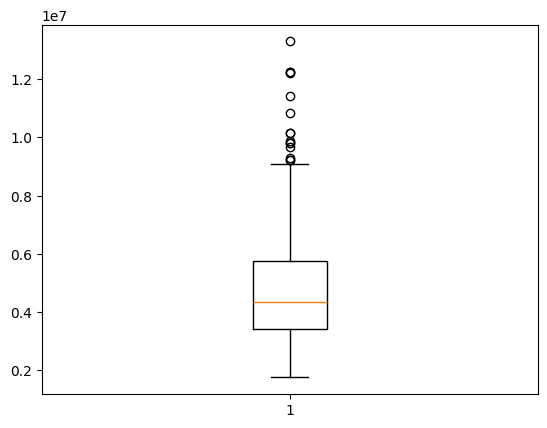

In [115]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

LOOKING FOR CORRELATIONS

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bedrooms', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='area', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>]], dtype=object)

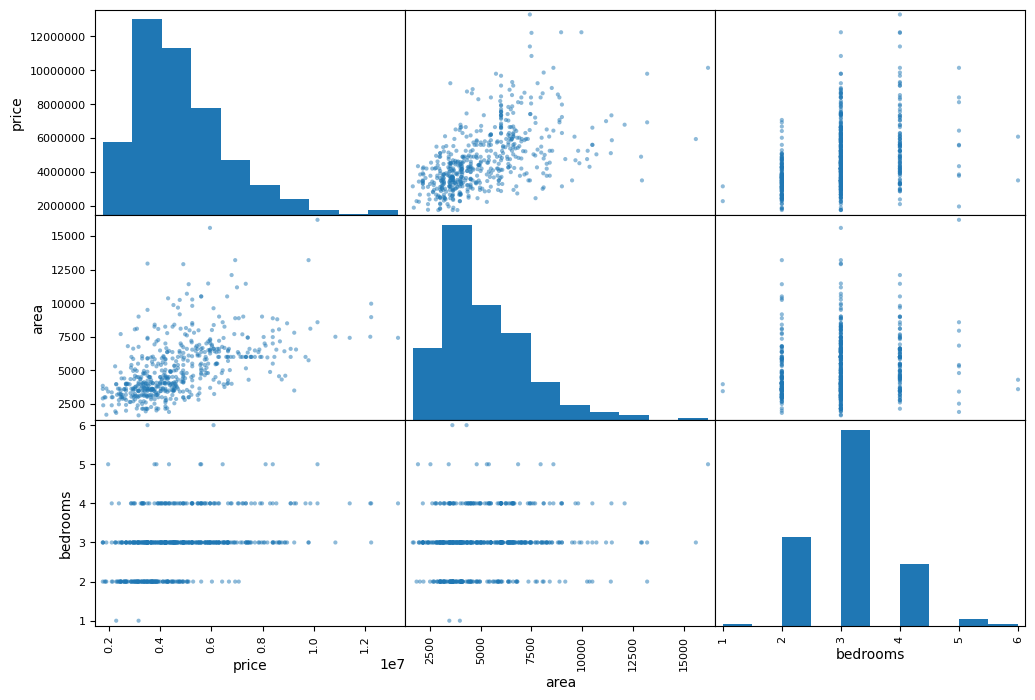

In [63]:
from pandas.plotting import scatter_matrix
attributes=["price","area","bedrooms"]
scatter_matrix(housing[attributes], figsize=(12,8))

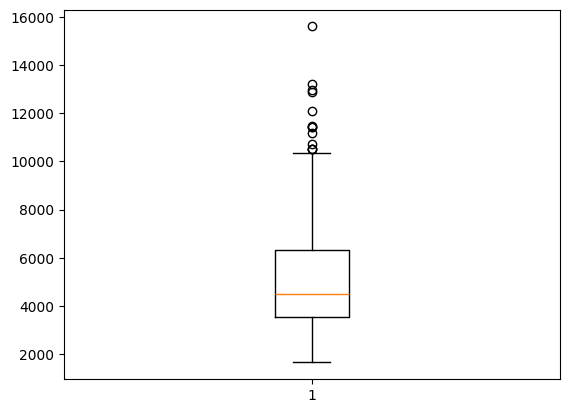

In [116]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

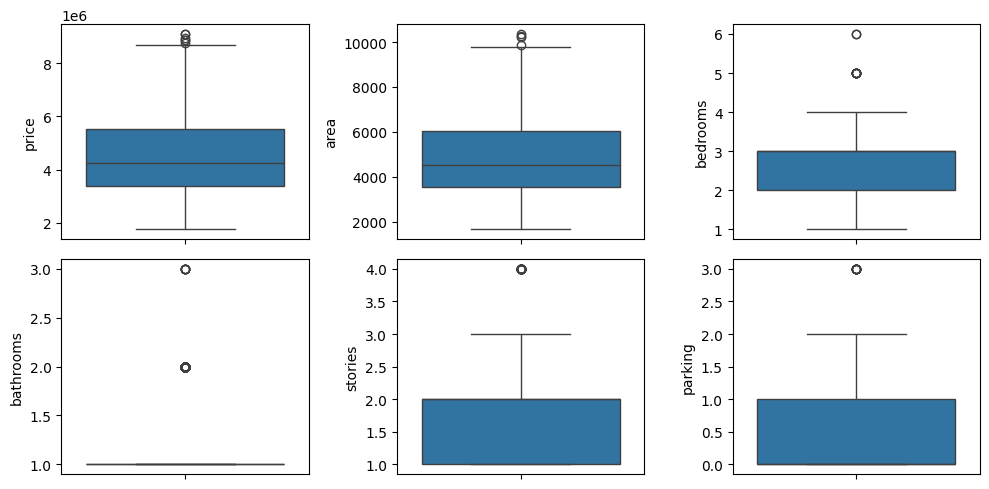

In [117]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

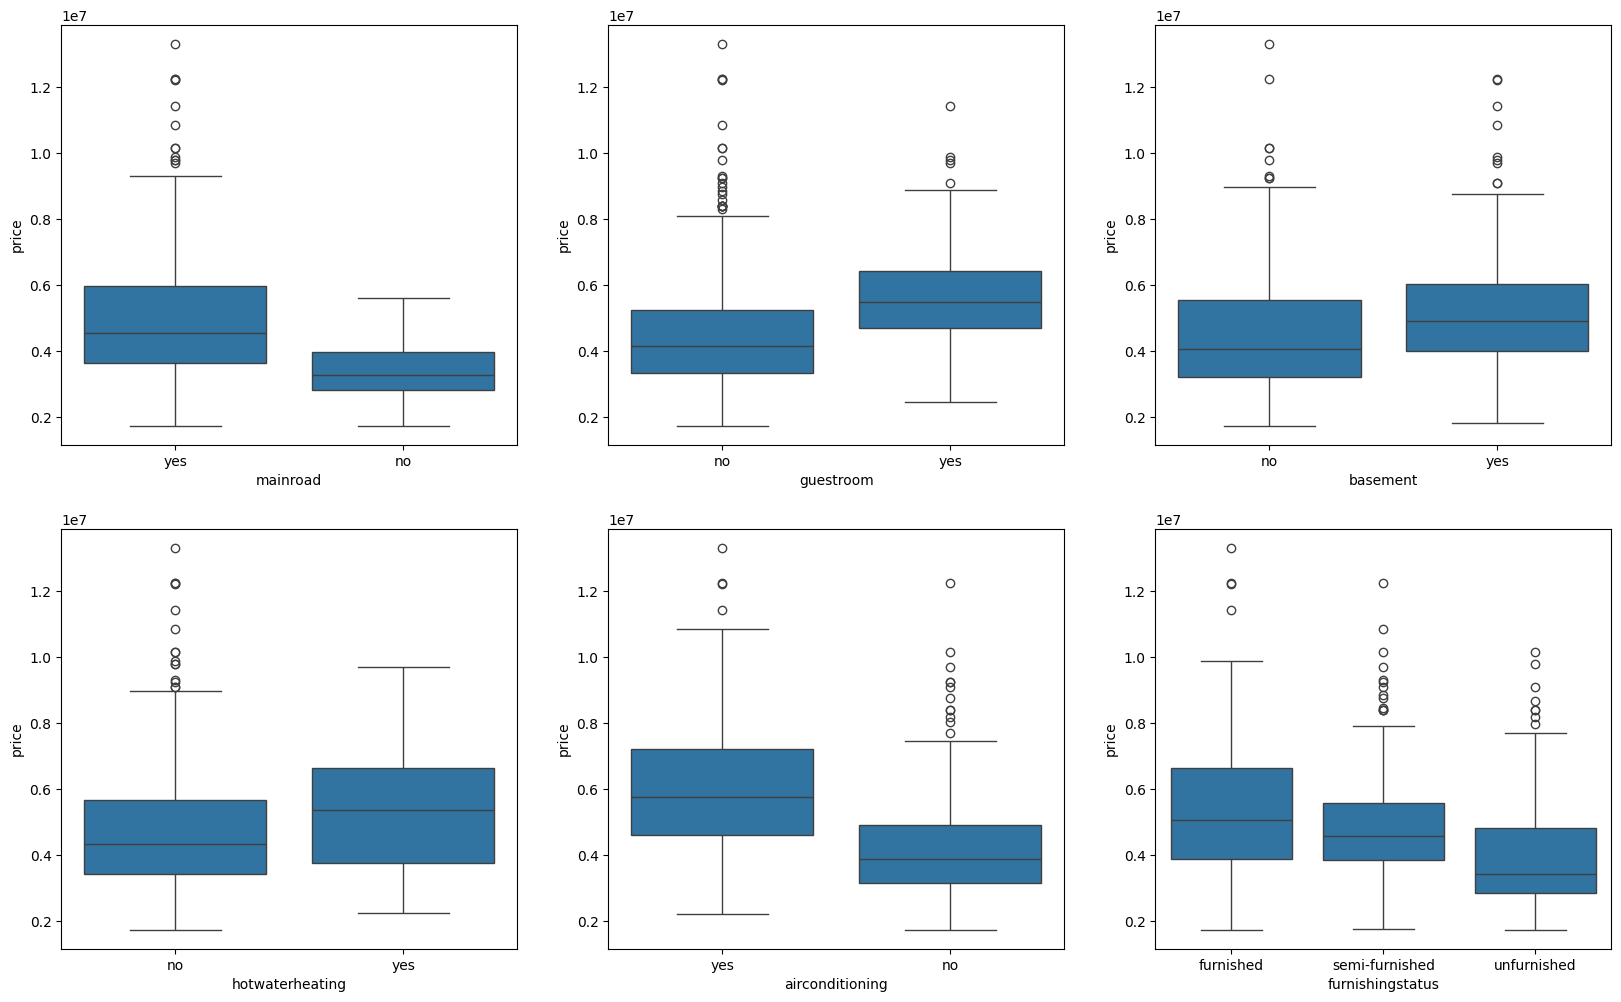

In [65]:
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [189]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [190]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [206]:


housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [207]:
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [209]:
status=status.astype(np.uint8)
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [222]:

housing = pd.concat([housing, status], axis = 1)
housing = housing.loc[:, ~housing.columns.duplicated()]
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [356]:
#splitting the data into train and test data sets
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing,train_size=0.8, test_size=0.2, random_state=100)

In [226]:
#rescaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

train_set[num_vars] = scaler.fit_transform(train_set[num_vars])
train_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,1,0,0
93,0.433333,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,0,1,0
335,0.206667,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,1,0,0
412,0.160000,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,0,0,1
471,0.120000,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,0,1


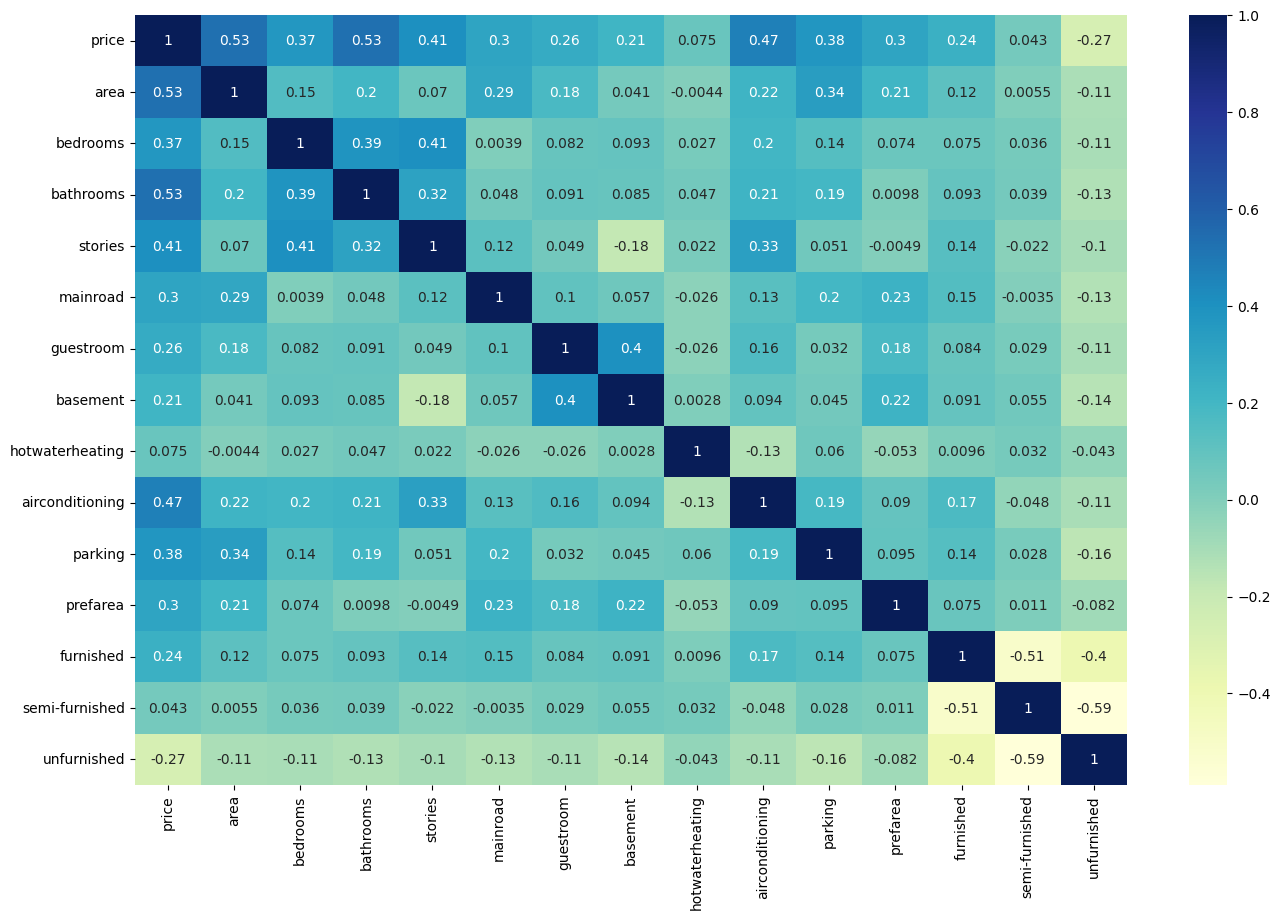

In [227]:
plt.figure(figsize = (16, 10))
sns.heatmap(train_set.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [357]:
y_train = train_set.pop('price')
X_train = train_set

y_test=test_set.pop('price')
X_test=test_set

In [354]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('area', False, 8),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', False, 3),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 4),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('furnished', False, 5),
 ('semi-furnished', False, 7),
 ('unfurnished', True, 1)]

In [246]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [247]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'furnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [331]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [264]:
test_set.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
316,0.365217,4,0.5,0.333333,0,0,1,0,0.0,0.333333,0.0,0,0,1
77,0.417391,3,0.5,0.666667,1,0,0,0,1.0,0.000000,1.0,1,0,0
360,0.203478,2,0.0,0.000000,1,0,0,0,0.0,0.000000,0.0,0,1,0
90,0.286957,3,0.0,0.333333,1,0,0,0,1.0,0.000000,0.0,0,1,0
493,0.196522,3,0.0,0.000000,1,0,0,0,0.0,0.000000,0.0,1,0,0


In [360]:
import statsmodels.api as sm 
nvars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking']
test_set[nvars] = scaler.fit_transform(test_set[nvars])

In [362]:

X_test = sm.add_constant(X_test)
X_test_rfe = X_test[X_train.columns]
# Assuming you have lm (your trained linear regression model)
y_pred = lm.predict(X_test_rfe)

In [363]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.6945432433765599

Text(0, 0.5, 'y_pred')

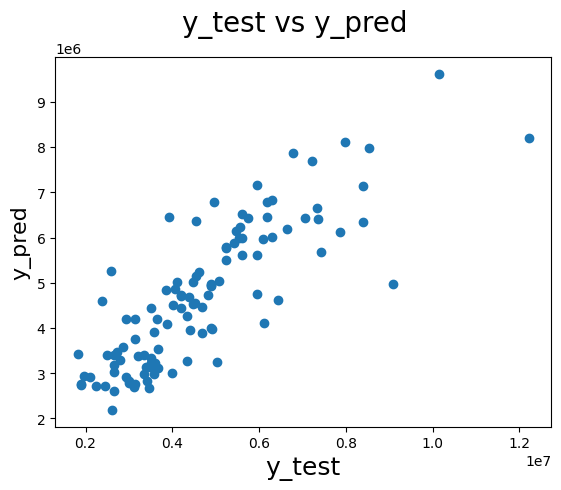

In [364]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label